### Deliverable 1: Preprocessing the Data for a Neural Network

In [49]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("Resources/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [50]:
print(type(application_df))

<class 'pandas.core.frame.DataFrame'>


In [51]:
print(application_df.dtypes)

EIN                        int64
NAME                      object
APPLICATION_TYPE          object
AFFILIATION               object
CLASSIFICATION            object
USE_CASE                  object
ORGANIZATION              object
STATUS                     int64
INCOME_AMT                object
SPECIAL_CONSIDERATIONS    object
ASK_AMT                    int64
IS_SUCCESSFUL              int64
dtype: object


In [52]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df.drop(["EIN", "NAME"], axis=1, inplace=True)


In [53]:
print(application_df.nunique(axis=0))

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64


In [54]:
app_type_cnts=application_df["APPLICATION_TYPE"].value_counts(dropna=False)
print(type(app_type_cnts))
app_type_cnts

<class 'pandas.core.series.Series'>


T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

<AxesSubplot:xlabel='APPLICATION_TYPE', ylabel='Density'>

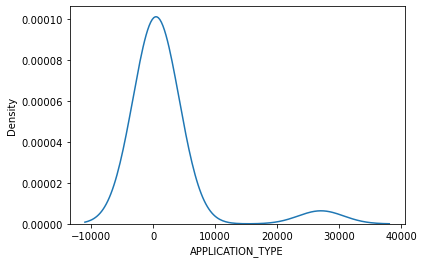

In [55]:
import seaborn as sns
%matplotlib inline
sns.kdeplot(app_type_cnts)

In [56]:
# Determine which values to replace if counts are less than ...?
replace_application=list(app_type_cnts[app_type_cnts<500].index)

# Replace in dataframe
for app in replace_application:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [57]:
# Look at CLASSIFICATION value counts for binning
class_type_cnts=application_df["CLASSIFICATION"].value_counts(dropna=False)
print(type(class_type_cnts))
class_type_cnts

<class 'pandas.core.series.Series'>


C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C1728        1
C1245        1
C6100        1
C1248        1
C2380        1
Name: CLASSIFICATION, Length: 71, dtype: int64

<AxesSubplot:xlabel='CLASSIFICATION', ylabel='Density'>

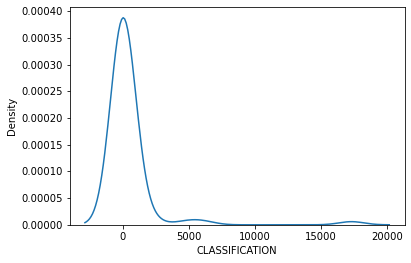

In [58]:
# Visualize the value counts of CLASSIFICATION
sns.kdeplot(class_type_cnts)

In [59]:
# Determine which values to replace if counts are less than ..?
replace_class=list(class_type_cnts[class_type_cnts<1883].index)

# Replace in dataframe
for cls in replace_class:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [60]:
# Generate our categorical variable lists
application_cat =application_df.dtypes[application_df.dtypes =="object"].index.tolist()
application_cat

['APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'ORGANIZATION',
 'INCOME_AMT',
 'SPECIAL_CONSIDERATIONS']

In [61]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df =pd.DataFrame(enc.fit_transform(application_df[application_cat]))
print(encode_df.columns)   #columns are a rangeIndex that need to be replaced by real names
print(encode_df.head())
# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(application_cat)
print(encode_df.columns)
print(encode_df.head())

RangeIndex(start=0, stop=41, step=1)
    0    1    2    3    4    5    6    7    8    9   ...   31   32   33   34  \
0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  1.0  0.0  0.0  0.0   
2  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  ...  0.0  0.0  0.0  0.0   
3  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  ...  0.0  1.0  0.0  0.0   
4  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  1.0  0.0   

    35   36   37   38   39   40  
0  0.0  0.0  0.0  0.0  1.0  0.0  
1  0.0  0.0  0.0  0.0  1.0  0.0  
2  0.0  0.0  0.0  0.0  1.0  0.0  
3  0.0  0.0  0.0  0.0  1.0  0.0  
4  0.0  0.0  0.0  0.0  1.0  0.0  

[5 rows x 41 columns]
Index(['APPLICATION_TYPE_Other', 'APPLICATION_TYPE_T10',
       'APPLICATION_TYPE_T19', 'APPLICATION_TYPE_T3', 'APPLICATION_TYPE_T4',
       'APPLICATION_TYPE_T5', 'APPLICATION_TYPE_T6', 'APPLICATION_TYPE_T7',
       'APPLICATION_TYPE_T8', 'AFFILIATION_Co

In [62]:
# Merge one-hot encoded features and drop the originals
application_df =application_df.merge(encode_df,left_index=True,right_index=True)
application_df =application_df.drop(application_cat,1)
application_df.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,108590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,5000,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,6692,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,142590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [63]:
# Split our preprocessed data into our features and target arrays
y =application_df["IS_SUCCESSFUL"].values
X =application_df.drop(["IS_SUCCESSFUL"],1).values

# Split the preprocessed data into a training and testing dataset
X_train,X_test,y_train,y_test =train_test_split(X,y,random_state=78)

In [64]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

### Deliverable 2: Compile, Train and Evaluate the Model

In [65]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
# number of input features = 43 columns in X, suggests 86-129 nodes in hidden layers
number_input_features =len(X_train[0])
hidden_nodes_layer1 =80
hidden_nodes_layer2 = 30
nn = tf.keras.models.Sequential()

# 43 input features
# weight parameters for each layer = number of input values times the number of neurons + bias term. bias=# neurons

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1,input_dim=number_input_features,activation="relu"))

# # Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2,activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1,activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 80)                3520      
_________________________________________________________________
dense_7 (Dense)              (None, 30)                2430      
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 31        
Total params: 5,981
Trainable params: 5,981
Non-trainable params: 0
_________________________________________________________________


In [66]:
# Compile the model
nn.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])

In [67]:
# # Import checkpoint dependencies
# import os
# from tensorflow.keras.callbacks import ModelCheckpoint

# # Define the checkpoint path and filenames
# os.makedirs("checkpoints/",exist_ok=True)
# checkpoint_path ="checkpoints/weights.{epoch:02d}.hdf5"

# # Create a callback that saves the model's weights every epoch
# cp_callback =ModelCheckpoint(filepath=checkpoint_path,verbose=1,save_weights_only=True)

In [68]:
# Train the model
fit_model =nn.fit(X_train_scaled,y_train,epochs=100)

Epoch 1/100
804/804 [==============================] - 0s 499us/step - loss: 0.5688 - accuracy: 0.7233
Epoch 2/100
804/804 [==============================] - 0s 503us/step - loss: 0.5550 - accuracy: 0.7289
Epoch 3/100
804/804 [==============================] - 0s 505us/step - loss: 0.5533 - accuracy: 0.7309
Epoch 4/100
804/804 [==============================] - 0s 527us/step - loss: 0.5509 - accuracy: 0.7308
Epoch 5/100
804/804 [==============================] - 0s 500us/step - loss: 0.5504 - accuracy: 0.7327
Epoch 6/100
804/804 [==============================] - 0s 512us/step - loss: 0.5478 - accuracy: 0.7339
Epoch 7/100
804/804 [==============================] - 0s 495us/step - loss: 0.5484 - accuracy: 0.7327
Epoch 8/100
804/804 [==============================] - 0s 514us/step - loss: 0.5483 - accuracy: 0.7333
Epoch 9/100
804/804 [==============================] - 0s 502us/step - loss: 0.5469 - accuracy: 0.7335
Epoch 10/100
804/804 [==============================] - 0s 504us/step - l

In [70]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5569 - accuracy: 0.7262
Loss: 0.5568874478340149, Accuracy: 0.7261807322502136


<AxesSubplot:>

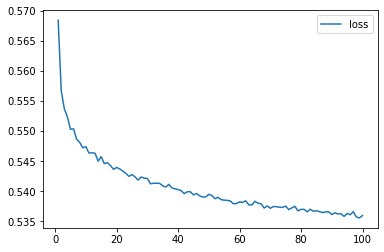

In [23]:
# Create a DataFrame containing training history
history_df =pd.DataFrame(fit_model.history,index=range(1,len(fit_model.history["loss"])+1))
# Plot the loss
history_df.plot(y="loss")


<AxesSubplot:>

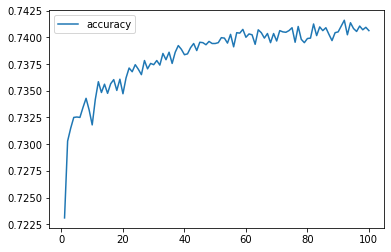

In [24]:
# Plot the accuracy
history_df.plot(y="accuracy")

In [26]:
# Export our model to HDF5 file
nn.save("trained_charity_model.h5")